In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('ASTRAMICRO.NS.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-11-01,26.733334,28.000000,25.466665,27.973333,23.467009,153375
1,2004-11-08,29.333332,29.333332,27.466665,27.866667,23.377522,47760
2,2004-11-15,27.866667,28.966665,27.000000,27.466665,23.041958,42465
3,2004-11-22,27.933332,30.700001,27.333332,30.506666,25.592236,156330
4,2004-11-29,30.593332,31.093332,27.420000,27.773333,23.299223,56370


In [7]:
df.dropna(inplace=True)  # Remove missing values
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful date components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek
0,2004-11-01,26.733334,28.000000,25.466665,27.973333,23.467009,153375,2004,11,1,0
1,2004-11-08,29.333332,29.333332,27.466665,27.866667,23.377522,47760,2004,11,8,0
2,2004-11-15,27.866667,28.966665,27.000000,27.466665,23.041958,42465,2004,11,15,0
3,2004-11-22,27.933332,30.700001,27.333332,30.506666,25.592236,156330,2004,11,22,0
4,2004-11-29,30.593332,31.093332,27.420000,27.773333,23.299223,56370,2004,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...
948,2023-01-02,287.000000,304.000000,274.850006,283.600006,283.600006,3740770,2023,1,2,0
949,2023-01-09,286.399994,298.799988,281.000000,283.549988,283.549988,1836933,2023,1,9,0
950,2023-01-16,284.049988,288.000000,279.000000,281.100006,281.100006,765279,2023,1,16,0
951,2023-01-23,281.850006,282.500000,251.149994,260.600006,260.600006,1213539,2023,1,23,0


In [9]:
# Drop the original 'Date' and target column 'Close' from features
X = df.drop(columns=['Date', 'Close']).values
y = df['Close'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

In [16]:
svr = SVR()  # You can also try 'linear' or 'poly'
svr.fit(X_train_scaled, y_train_scaled)

SVR()

In [17]:
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 32.61
R² Score: 0.9920


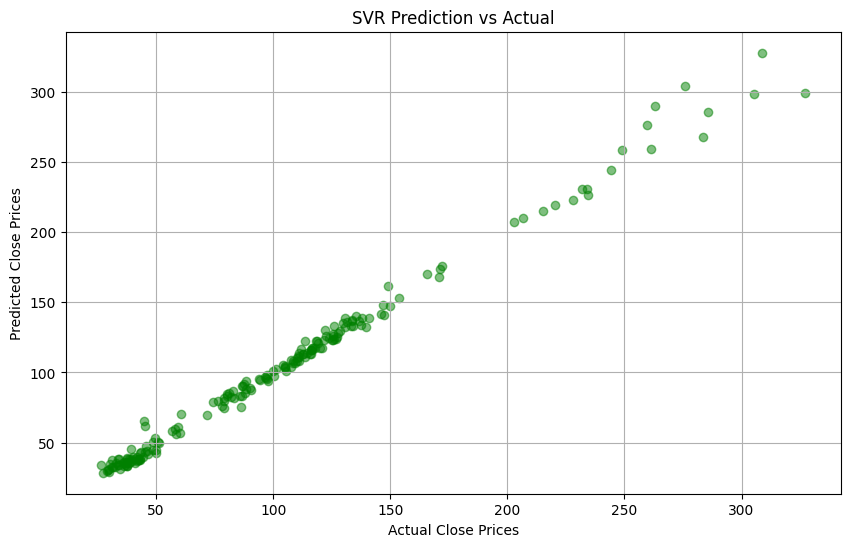

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.title("SVR Prediction vs Actual")
plt.grid(True)
plt.show()